In [1]:
# Import Libraries
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [22]:
# Load Data
url='https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/IMDB-Movie-Data.csv'
df= pd.read_csv(url)
df.to_csv('C:/Users/Ismail/Desktop/Projects for GitHup/movie-analytics/IMDB-Movie-Data.csv',index=False)

In [6]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [7]:
# Data Info and Cleaning
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [8]:
# for Revenue
df['Revenue_median']=df['Revenue (Millions)'].median()
df['Revenue_Imputed']=df['Revenue (Millions)'].fillna(df['Revenue_median'])
df['Revenue_imputed_flag']=df['Revenue (Millions)'].isna().astype(int)

In [10]:
# for Metascore
df['Metascore_imputed'] = df.groupby('Genre')['Metascore']\
    .transform(lambda x: x.fillna(x.mean()))

In [12]:
# Feature Engineering 
df['Year']=df['Year']
df['DurationCategory']=pd.cut(df['Runtime (Minutes)'],bins=[0,90,120,180],labels=['Short','Medium','Long'])

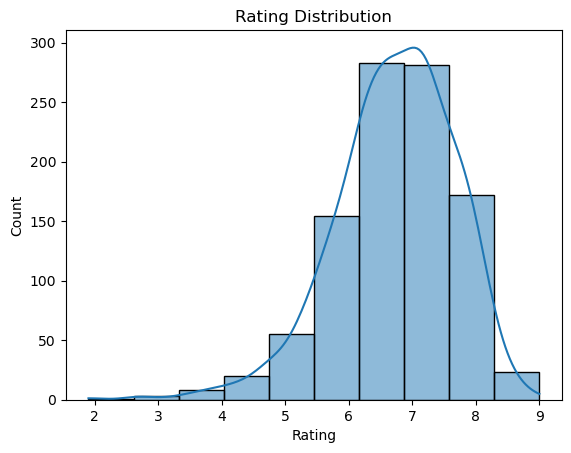

In [13]:
# Visualization 
sns.histplot(df['Rating'],bins=10,kde=True)
plt.title('Rating Distribution')
plt.savefig('Raing Distribution',dpi=300,bbox_inches='tight')
plt.show()

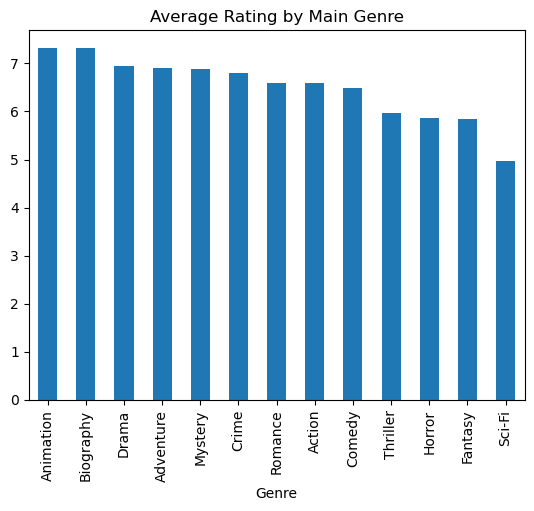

In [20]:
# Genre Average Rating
df['Genre']=df['Genre'].str.split(',').str[0]
genre_avg=df.groupby('Genre')['Rating'].mean().sort_values(ascending=False)
genre_avg.to_csv('C:/Users/Ismail/Desktop/Projects for GitHup/movie-analytics/outputs/Average Rating by Main Genre.csv')
genre_avg.plot(kind='bar')
plt.title('Average Rating by Main Genre')
plt.savefig('C:/Users/Ismail/Desktop/Projects for GitHup/movie-analytics/figures/genre_ratings.png')
plt.show()

In [16]:
year_count=df['Year'].value_counts().sort_index()
year_count.to_csv('C:/Users/Ismail/Desktop/Projects for GitHup/movie-analytics/outputs/year_trends.csv')
year_count.plot(kind='line',marker='o')
plt.title('Number of Movies Released per Year')
plt.savefig('C:/Users/Ismail/Desktop/Projects for GitHup/movie-analytics/figures/year_trends.png')
plt.clf()

<Figure size 640x480 with 0 Axes>

In [17]:
# Top Directors 
dirs=df['Director'].value_counts().head(10)
dirs.to_csv('C:/Users/Ismail/Desktop/Projects for GitHup/movie-analytics/outputs/director_count.csv')
dirs.plot(kind='barh')
plt.title('Top 10 Directors by Count')
plt.savefig('C:/Users/Ismail/Desktop/Projects for GitHup/movie-analytics/figures/top_directors.png')
plt.clf()

<Figure size 640x480 with 0 Axes>

In [18]:
# summary stats
summary=df[['Rating','Runtime (Minutes)','Revenue_Imputed']].describe()
summary.to_csv('C:/Users/Ismail/Desktop/Projects for GitHup/movie-analytics/outputs/stats_summary.csv')